<a href="https://colab.research.google.com/github/oytungunes/PythonCodeExamples/blob/main/AutoEncoderExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autoencoder is a type of neural network that can be used to learn a compressed representation of raw data.

An autoencoder is composed of an encoder and a decoder sub-models. The encoder compresses the input and the decoder attempts to recreate the input from the compressed version provided by the encoder. After training, the encoder model is saved and the decoder is discarded.

The encoder can then be used as a data preparation technique to perform feature extraction on raw data that can be used to train a different machine learning model.


This example i


Epoch 1/200
42/42 - 2s - loss: 0.2338 - val_loss: 0.1677
Epoch 2/200
42/42 - 0s - loss: 0.0388 - val_loss: 0.0989
Epoch 3/200
42/42 - 0s - loss: 0.0232 - val_loss: 0.0508
Epoch 4/200
42/42 - 0s - loss: 0.0183 - val_loss: 0.0292
Epoch 5/200
42/42 - 0s - loss: 0.0159 - val_loss: 0.0199
Epoch 6/200
42/42 - 0s - loss: 0.0143 - val_loss: 0.0149
Epoch 7/200
42/42 - 0s - loss: 0.0135 - val_loss: 0.0108
Epoch 8/200
42/42 - 0s - loss: 0.0117 - val_loss: 0.0087
Epoch 9/200
42/42 - 0s - loss: 0.0106 - val_loss: 0.0070
Epoch 10/200
42/42 - 0s - loss: 0.0109 - val_loss: 0.0080
Epoch 11/200
42/42 - 0s - loss: 0.0104 - val_loss: 0.0063
Epoch 12/200
42/42 - 0s - loss: 0.0097 - val_loss: 0.0057
Epoch 13/200
42/42 - 0s - loss: 0.0096 - val_loss: 0.0057
Epoch 14/200
42/42 - 0s - loss: 0.0083 - val_loss: 0.0052
Epoch 15/200
42/42 - 0s - loss: 0.0086 - val_loss: 0.0060
Epoch 16/200
42/42 - 0s - loss: 0.0084 - val_loss: 0.0047
Epoch 17/200
42/42 - 0s - loss: 0.0079 - val_loss: 0.0058
Epoch 18/200
42/42 - 0s

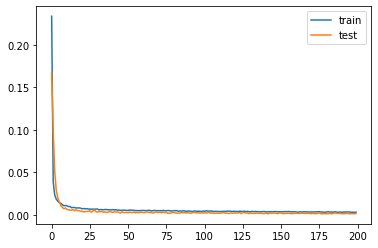

In [ ]:
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')